## Step 1: Generate Random Dataset

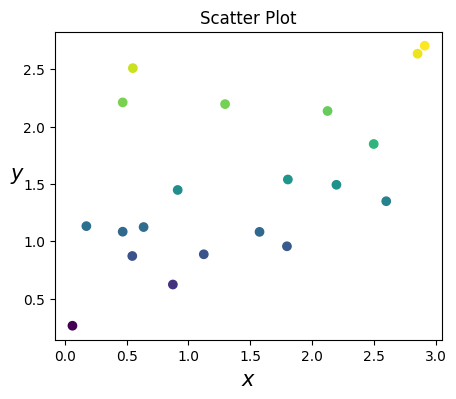

In [7]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)
m = 20
x = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * x + np.random.randn(m, 1) / 1.5
x_test = np.linspace(0, 3, 100).reshape(100, 1)

x_poly = PolynomialFeatures(degree=10, include_bias = True)
x_poly.fit_transform(x)
#print(x_poly.get_feature_names())


import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
plt.scatter(x,y,c=y)
plt.ylabel("$y$", rotation=0, fontsize=15)
plt.xlabel("$x$", rotation=0, fontsize=15)
plt.title('Scatter Plot')
plt.show()

## Step 2: Buid Model

Cross Validation Errors: 5.20933438773451
Theta: 
 [[ 0.00000000e+00  6.43580701e+00  2.57281710e+01 -2.75008053e+02
  -1.90585036e+03  2.11658121e+04 -7.55141492e+04  1.37974410e+05
  -1.39291200e+05  7.39888222e+04 -1.61744622e+04]]


Text(0, 0.5, '$y$')

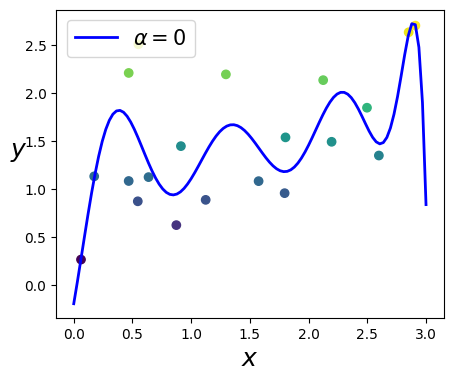

In [8]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import cross_val_score

alpha = 0

model = Ridge(alpha=alpha, solver='auto', random_state = 42)  
model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=True)),
        ("std_scaler", StandardScaler()),
        ("regul_reg", model),
    ])
model.fit(x, y)
y_pred = model.predict(x_test)
cross_valid = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv = 5)
print('Cross Validation Errors:', -np.mean(cross_valid))
print('Theta: \n', model.named_steps["regul_reg"].coef_)

plt.figure(figsize=(5,4))
X_new = np.linspace(0, 3, 100).reshape(100, 1)
plt.plot(X_new, y_pred, "b-", linewidth=2, label=r"$\alpha = {}$".format(alpha))
plt.scatter(x,y,c=y)
plt.legend(loc="upper left", fontsize=15)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

## Step 3：Train Model with Different Alphas

Cross Validation Errors: 5.209334387522693 with alpha =  0
Cross Validation Errors: 0.36572419139439083 with alpha =  10
Cross Validation Errors: 0.3606659429154976 with alpha =  100


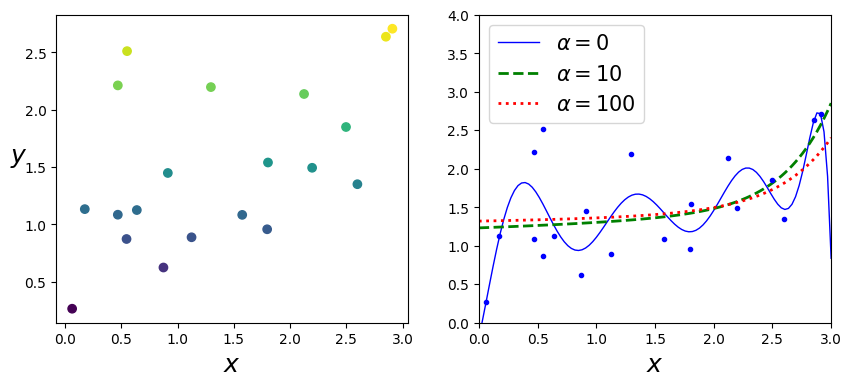

In [9]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

np.random.seed(42)
m = 20
x = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * x + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)


def plot_model(model_class, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        # Ridge alpha=0 => linear regression
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression() 
        # Ponimal Regression
        model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=True)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
        model.fit(x, y)
        y_new_regul = model.predict(X_new)
        
        cross_valid = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv = 5)
        print('Cross Validation Errors:', -np.mean(cross_valid), 'with alpha = ', alpha)

        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
   
    plt.plot(x, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(x,y,c=y)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.xlabel("$x$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, alphas=(0, 10**1, 10**2), random_state=42)

plt.show()
